# Large Language Models and Foundation AI

This notebook explores how **Large Language Models (LLMs)** and **Foundation Models** revolutionize AI. These models leverage massive datasets, deep transformer architectures, and self-supervised learning to understand, generate, and adapt across domains.

---
### Objectives
- Understand how LLMs extend Generative AI principles.
- Explore transformer internals: embeddings, self-attention, contextual encoding.
- Demonstrate tokenization, embeddings, and text generation.
- Differentiate prompting vs fine-tuning.
- Examine cross-domain foundation model use cases.

## ⚙️ 1. From Generative AI to Foundation Models

Generative AI models create new data based on learned distributions. **Foundation Models** push this further — they are *general-purpose models* pre-trained on massive, diverse datasets and adaptable across multiple tasks via fine-tuning or prompting.

| Level | Model Type | Training Scope | Example |
|--------|-------------|----------------|----------|
| Narrow | Task-specific ML | Labeled, single-domain | Spam Classifier |
| Broad | Generative Model | Unsupervised, single-modality | GPT-2, VAE |
| Foundational | Multi-domain, cross-modal | Massive unstructured pre-training | GPT-4, Gemini, Claude, LLaMA, WatsonX |

These models serve as the *foundation* for downstream tasks across NLP, vision, code, and science.

## 🧩 2. Inside Transformers — The Core of LLMs

Transformers rely on three main ideas:

1. **Embeddings:** Convert tokens (words/subwords) into numerical vectors.
2. **Self-Attention:** Learn contextual relationships between all tokens in a sequence.
3. **Feed-Forward Layers:** Transform attention outputs into predictions.

Each token attends to every other token — allowing the model to capture long-range dependencies, unlike RNNs or CNNs.

In [6]:
from graphviz import Digraph

g = Digraph('Transformer', format='png')
g.attr(rankdir='LR', size='8,4')
g.attr('node', shape='box', style='filled', fillcolor='lightblue')
g.node('E', 'Embedding Layer')
g.node('A', 'Self-Attention')
g.node('F', 'Feed Forward + Normalization')
g.node('O', 'Output Tokens')
g.edges([('E','A'), ('A','F'), ('F','O')])
g.attr(label='Transformer Core Flow: Embedding → Attention → Output')
g.render('transformer_core', view=True)

'transformer_core.png'

## 🔤 3. Tokenization & Embedding Visualization

LLMs operate on **tokens**, not words. Each token is mapped to a vector space where semantically similar tokens cluster together.

Let’s see how a sentence is tokenized and embedded.

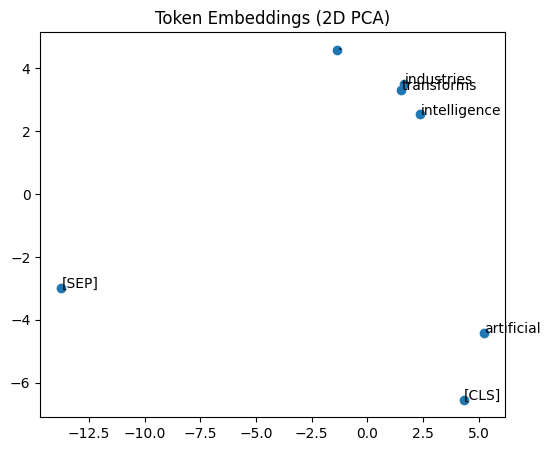

In [7]:
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

sentence = "Artificial intelligence transforms industries."
tokens = tokenizer(sentence, return_tensors='pt')
embeddings = model(**tokens).last_hidden_state.detach().numpy()[0]

pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)
words = tokenizer.convert_ids_to_tokens(tokens['input_ids'][0])

plt.figure(figsize=(6,5))
plt.scatter(coords[:,0], coords[:,1])
for i, w in enumerate(words):
    plt.text(coords[i,0]+0.02, coords[i,1], w)
plt.title('Token Embeddings (2D PCA)')
plt.show()

Each point represents a token in a semantic space — notice how words like *Artificial* and *intelligence* appear closer than random tokens.

## 🧭 4. Attention Mechanism (Conceptual Example)

Self-attention assigns **weights** to other tokens depending on relevance. This allows the model to focus selectively on important context.

Below, we simulate attention weights between words in a short sentence.

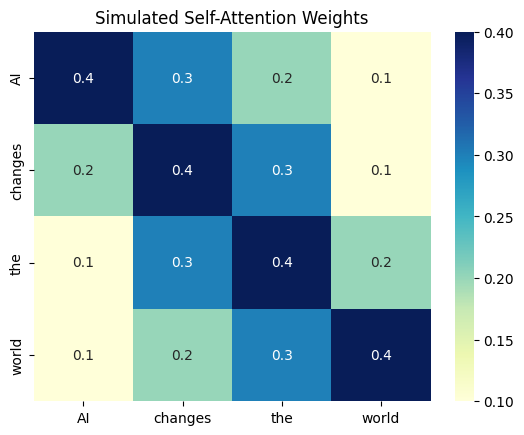

In [8]:
import seaborn as sns
import numpy as np

words = ['AI','changes','the','world']
attention = np.array([[0.4,0.3,0.2,0.1],
                      [0.2,0.4,0.3,0.1],
                      [0.1,0.3,0.4,0.2],
                      [0.1,0.2,0.3,0.4]])

sns.heatmap(attention, annot=True, xticklabels=words, yticklabels=words, cmap='YlGnBu')
plt.title('Simulated Self-Attention Weights')
plt.show()

Darker cells indicate stronger attention relationships — e.g., *AI* strongly attends to *changes*.

## ✍️ 5. Generating Text with a Pre-Trained LLM

Let’s use a pre-trained GPT-style model via Hugging Face’s `pipeline()` for quick inference.

In [18]:
from transformers import pipeline

generator = pipeline('text-generation', model='gpt2')
prompt = "Foundation models are revolutionizing AI by"
result = generator(prompt, max_length=40, num_return_sequences=1)
print(result[0]['generated_text'])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=40) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Foundation models are revolutionizing AI by being able to create very complex algorithms, such as machine learning, and then build them into machines to apply their knowledge to the real world.

The world is now more filled with AI than when IBM first started, and the first-generation AI models are now being used to build artificial intelligence applications.

In the past, AI was thought to be a mere extension of human intelligence, being able to solve complex problems without any human intervention. In reality, humans interact with computers to solve complex problems, and this means that it has become possible for computers to understand human behavior, as well as the nature of human behavior.

There is a lot of talk about how AI could be a "superintelligence", but it's hard to find any evidence that any of that actually exists.

The AI model has already been built to solve problems that involve human behavior, including the most complex and complex problems of our day. In fact, many 

The model generates text word-by-word, predicting the next token conditioned on all previous tokens — the essence of autoregressive generation.

## 🧮 6. Prompting vs Fine-Tuning

Foundation models can be adapted in two primary ways:

| Method | Description | Example |
|----------|-------------|----------|
| **Prompting** | Use natural-language instructions to steer model behavior without changing weights. | *“Summarize this paragraph in one line.”* |
| **Fine-Tuning** | Train on a domain-specific dataset to adjust weights for new objectives. | Legal-domain GPT fine-tuned for contracts |

Below is a small example showing the same model performing two tasks with just prompt changes.

In [ ]:
task1 = generator("Explain AI in one sentence:", max_length=30, num_return_sequences=1)
task2 = generator("Write a short poem about AI:", max_length=30, num_return_sequences=1)
print('Task 1:', task1[0]['generated_text'])
print('\nTask 2:', task2[0]['generated_text'])

Prompt engineering allows fast task switching without retraining, while fine-tuning enables deep domain adaptation.

## 🌍 7. Foundation Models Across Domains

| Domain | Example Model | Task |
|---------|----------------|------|
| **Language** | GPT-4, Claude, LLaMA | Text generation, reasoning |
| **Vision** | DALL-E 2, Stable Diffusion | Image generation from text |
| **Code** | Codex, StarCoder, Copilot | Code synthesis and explanation |
| **Science** | MoLFormer, AlphaFold 2 | Molecular & protein prediction |
| **Multimodal** | Gemini 1.5 Pro, ImageBind | Text ↔ Vision ↔ Audio integration |

## ⚖️ 8. Limitations & Ethical Considerations

- **Compute & Energy Costs:** Training billions of parameters requires massive compute clusters.
- **Bias & Fairness:** Models inherit and amplify biases in their training data.
- **Hallucinations:** LLMs may produce plausible but incorrect outputs.
- **Data Governance:** Many open-source models lack clear dataset transparency.
- **Security & Privacy:** Prompt-injection and data-leak vulnerabilities persist.

## 📘 9. Summary

- **LLMs** are massive transformer-based models trained on diverse corpora using self-supervised objectives.
- **Foundation models** generalize across tasks and domains, serving as adaptable bases for specialized AI applications.
- Techniques like **prompting**, **fine-tuning**, and **parameter-efficient adaptation** enable task-specific control.
- Modern enterprise AI (Watson X, Vertex AI, OpenAI API) builds on these principles to deliver scalable, responsible intelligence.